In [1]:
import numpy as np
import scipy.integrate as integrate
from scipy.interpolate import interp1d
import scipy.optimize as optimize
import sncosmo
import matplotlib.pyplot as plt

In [2]:
csp = sncosmo.get_magsystem('csp')
zp = 14.328

In [3]:
x_gr = np.linspace(-10, 50, 60 + 1)

# Reading the templates

## M0

In [4]:
x_m0 = []
y_m0 = []
z_m0 = []

In [5]:
file = open("M0.dat")
lines = file.readlines()
file.close()

for line in lines:
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    x_m0.append(co[0])
    y_m0.append(co[1])
    z_m0.append(co[2])

x_m0 = np.array(x_m0, dtype=float)
y_m0 = np.array(y_m0, dtype=float)
z_m0 = np.array(z_m0, dtype=float)

## M1

In [6]:
x_m1 = []
y_m1 = []
z_m1 = []

In [7]:
file = open("M1.dat")
lines = file.readlines()
file.close()

for line in lines:
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    x_m1.append(co[0])
    y_m1.append(co[1])
    z_m1.append(co[2])

x_m1 = np.array(x_m1, dtype=float)
y_m1 = np.array(y_m1, dtype=float)
z_m1 = np.array(z_m1, dtype=float)

## M2

In [8]:
x_m2 = []
y_m2 = []
z_m2 = []

In [9]:
file = open("M2.dat")
lines = file.readlines()
file.close()

for line in lines:
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    x_m2.append(co[0])
    y_m2.append(co[1])
    z_m2.append(co[2])

x_m2 = np.array(x_m2, dtype=float)
y_m2 = np.array(y_m2, dtype=float)
z_m2 = np.array(z_m2, dtype=float)

## filtro(s)

In [10]:
y_filter = []
z_filter = []

In [11]:
file = open("B_CSP2_tel_ccd_atm_ext_1.2.dat")
lines = file.readlines()
file.close()

for line in lines:
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    y_filter.append(co[0])
    z_filter.append(co[1])

y_filter = np.array(y_filter, dtype=float)
z_filter = np.array(z_filter, dtype=float)

f_filter = interp1d(y_filter, z_filter, kind='cubic')

In [12]:
def lightcurvesthM0(time):
    y_temp = []
    z_temp = []
    
    for j in range(0,len(x_m0)):
        
        if x_m0[j] == time:
            #print("ok")
            y_temp.append(y_m0[j])
            z_temp.append(z_m0[j])
            
    #print(y_temp, z_temp)
        
    f = interp1d(y_temp, z_temp, kind='cubic')        
    #print(y_temp)
    def S(x): return f(x)*f_filter(x)
        
    return integrate.quad(S, min(y_filter), max(y_filter))[0]

In [13]:
def lightcurvesthM1(time):
    y_temp = []
    z_temp = []
    
    for j in range(0,len(x_m1)):
        
        if x_m0[j] == time:
            #print("ok")
            y_temp.append(y_m1[j])
            z_temp.append(z_m1[j])
            
    #print(y_temp, z_temp)
        
    f = interp1d(y_temp, z_temp, kind='cubic')        
    #print(y_temp)
    def S(x): return f(x)*f_filter(x)
        
    return integrate.quad(S, min(y_filter), max(y_filter))[0]

In [14]:
def lightcurvesthM2(time):
    y_temp = []
    z_temp = []
    
    for j in range(0,len(x_m2)):
        
        if x_m0[j] == time:
            #print("ok")
            y_temp.append(y_m2[j])
            z_temp.append(z_m2[j])
            
    #print(y_temp, z_temp)
        
    f = interp1d(y_temp, z_temp, kind='cubic')        
    #print(y_temp)
    def S(x): return f(x)*f_filter(x)
        
    return integrate.quad(S, min(y_filter), max(y_filter))[0]

In [65]:
y_tt = []
for i in range(0,len(x_gr)):
    
    y_tt.append(lightcurvesthM2(x_gr[i]))
    

/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


<IPython.core.display.Javascript object>


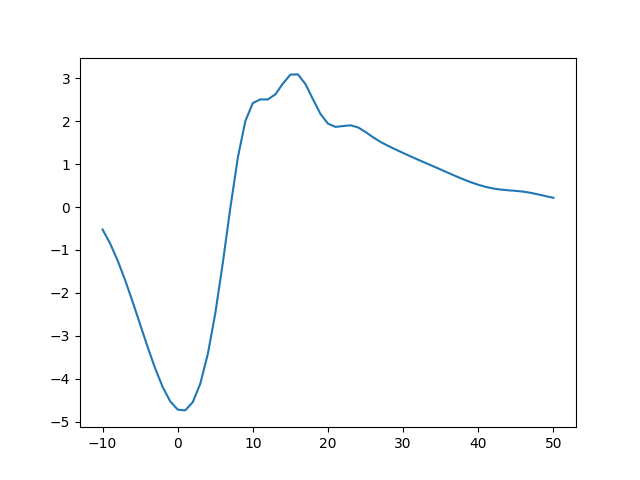

In [66]:
%matplotlib notebook
plt.plot(x_gr, y_tt)
plt.show()

## interpolating functions

In [15]:
x_m0_int = []
z_m0_int = []

x_m1_int = []
z_m1_int = []

x_m2_int = []
z_m2_int = []

In [16]:
for i in range(0, len(x_gr)):
    
    x_m0_int.append(x_gr[i])
    z_m0_int.append(lightcurvesthM0(x_gr[i]))
    
    x_m1_int.append(x_gr[i])
    z_m1_int.append(lightcurvesthM1(x_gr[i]))
    
    x_m2_int.append(x_gr[i])
    z_m2_int.append(lightcurvesthM2(x_gr[i]))
    

f_m0 = interp1d(x_m0_int, z_m0_int, kind='cubic')  
f_m1 = interp1d(x_m1_int, z_m1_int, kind='cubic')
f_m2 = interp1d(x_m2_int, z_m2_int, kind='cubic')

/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


## reading the data

In [17]:
x_dat = []
z_dat = []
z_dat_error = []

In [18]:
file = open("SN2005M.dat")
lines = file.readlines()
file.close()

for line in lines:
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    x_dat.append(co[0])
    z_dat.append(co[1])
    z_dat_error.append(co[2])

x_dat = np.array(x_dat, dtype=float)
z_dat = np.array(z_dat, dtype=float)
z_dat_error = np.array(z_dat_error, dtype=float)

filter_name = lines[0][1:-1]

redshift = float(lines[1][1:])
#redshift = 0.012526589416171241

In [19]:
print(filter_name)
print(redshift)

cspb
0.022


In [20]:
for i in range(0,len(x_dat)):
    
    z_dat_error[i] = 2*np.log(10)*(10**((zp - z_dat[i])/2.5))*z_dat_error[i]/2.5
    z_dat[i] = csp.band_mag_to_flux(z_dat[i], filter_name)
    

In [21]:
for i in range(0,len(x_dat)):
    
    x_dat[i] = x_dat[i]*(1+redshift)
    z_dat[i] = z_dat[i]*(1+redshift)**3
    z_dat_error[i] = z_dat_error[i]*(1+redshift)**3

In [22]:
from iminuit import Minuit

In [23]:
def chi_quad(t0, x0, x1, x2):
    
    chiquad = 0    
    
    for i in range(0,len(x_dat)):
        
        if -10 < x_dat[i] - t0 < 50:

            #print(x_dat[i] - par[0])

            chiquad += ((x0*(f_m0(x_dat[i] - t0) + x1*f_m1(x_dat[i] - t0) + x2*f_m2(x_dat[i] -t0)) - z_dat[i])/z_dat_error[i])**2
    if chiquad > 0:
        
        return chiquad
    
    else:
        
        return 10**200

In [24]:
max_index = list(z_dat).index(max(z_dat))

In [25]:
x_dat[max_index]

415.66784

In [67]:
m = Minuit(chi_quad, t0 = x_dat[max_index], x0 = 0.2/7, x1 = 0.001, x2 = 0.0001)

/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter t0 is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter x0 is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter x1 is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter x2 is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: InitialParamWarning: errordef is not given. Default to 1.
  """Entry poin

In [68]:
m.migrad()
print(m.values) 

<ValueView of Minuit at 3d53148>
  t0: 413.2603344864139
  x0: 0.032825906882724014
  x1: -0.14383187968468666
  x2: 0.24344332140913888


In [69]:
x_plot = []
z_plot = []

In [70]:
def theory(tv, x0, x1, x2):
    #print(tv, x0, x1, x2)
    
    return x0*(f_m0(tv) + x1*f_m1(tv) + x2*f_m2(tv))

In [71]:
for i in range(0,len(x_gr)):
    
    x_plot.append(x_gr[i])
    z_plot.append(theory(x_gr[i], m.values[1], m.values[2], m.values[3]))

In [72]:
x_plot_dat = []
z_plot_dat = []

In [73]:
for i in range(0,len(x_dat)):
    
    x_plot_dat.append(x_dat[i]-m.values[0])
    z_plot_dat.append(z_dat[i])
    

<IPython.core.display.Javascript object>


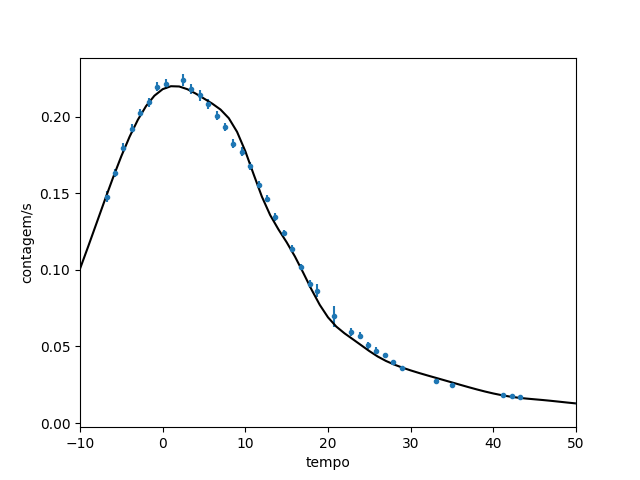

In [74]:
%matplotlib notebook
plt.plot(x_plot, z_plot, 'k')
plt.errorbar(x_plot_dat, z_plot_dat, yerr=z_dat_error, fmt='.')
plt.xlim(-10,50)
plt.xlabel("tempo")
plt.ylabel("contagem/s")
plt.show()

In [75]:
m.fval / (len(z_plot_dat) - len(m.values))

1.8534320947471656

In [76]:
len(m.values)

4